# Descriptive analysis of local transportation


This is Exploratory Descriptive Analisys of expendure with local transportation. So we will create three notebook to explore the data of the follows subquotas: 'Taxi, toll and parking', 'Automotive vehicle renting or charter' and 'Fuels and lubricants'. We basically used the same analysis used by Irio in his descriptive analysis of all dataset in https://github.com/datasciencebr/serenata-de-amor/blob/master/develop/2016-08-13-irio-descriptive-analysis.ipynb

The analysis of others subquota are in:

'Automotive vehicle renting or charter': work in progress

'Taxi, toll and parking': work in progress

### This first notebook is about subquota 'Fuels and lubricants'

Importing the dataset

In [71]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import math

In [72]:
data = pd.read_csv('../data/2017-03-14-reimbursements.xz',
                   parse_dates=[16],
                   low_memory=False,
                   dtype={'document_id': np.str,
                          'congressperson_id': np.str,
                          'congressperson_document': np.str,
                          'term_id': np.str,
                          'cnpj_cpf': np.str,
                          'reimbursement_number': np.str,})

All reimbursement of subquota 'Fuels and lubricants' will be set in **data_fuel** variable, this is the main data who we will will use in this notebook.

In [73]:
data_fuel = data[data['subquota_description'] == 'Fuels and lubricants']

Since 2013 was 569.729 documents of reimbursement.

In [74]:
print(data_fuel.shape)

(569729, 31)


In [75]:
data_fuel.head()

,year,applicant_id,document_id,reimbursement_value_total,total_net_value,reimbursement_numbers,congressperson_name,congressperson_id,congressperson_document,term,...,issue_date,document_value,remark_value,net_values,month,installment,passenger,leg_of_the_trip,batch_number,reimbursement_values
0,2009,1001,1564212,NaN,130.00,2888,DILCEU SPERAFICO,73768,444,2015.0,...,2009-04-06T00:00:00,130.00,0.0,130.00,4,0,NaN,NaN,388810,NaN
3,2009,1001,1568056,NaN,170.00,2894,DILCEU SPERAFICO,73768,444,2015.0,...,2009-04-14T00:00:00,170.00,0.0,170.00,4,0,NaN,NaN,390158,NaN
4,2009,1001,1568098,NaN,100.11,2894,DILCEU SPERAFICO,73768,444,2015.0,...,2009-04-09T00:00:00,100.11,0.0,100.11,4,0,NaN,NaN,390158,NaN
7,2009,1001,1571739,NaN,93.40,2896,DILCEU SPERAFICO,73768,444,2015.0,...,2009-03-06T00:00:00,93.40,0.0,93.40,3,0,NaN,NaN,391417,NaN
8,2009,1001,1571742,NaN,116.53,2896,DILCEU SPERAFICO,73768,444,2015.0,...,2009-03-20T00:00:00,116.53,0.0,116.53,3,0,NaN,NaN,391417,NaN


In [76]:
data_fuel.iloc[0]

year                                                       2009
applicant_id                                               1001
document_id                                             1564212
reimbursement_value_total                                   NaN
total_net_value                                             130
reimbursement_numbers                                      2888
congressperson_name                            DILCEU SPERAFICO
congressperson_id                                         73768
congressperson_document                                     444
term                                                       2015
state                                                        PR
party                                                        PP
term_id                                                      55
subquota_number                                               3
subquota_description                       Fuels and lubricants
subquota_group_id                       

All the expedures sums more than **R$127 Million**

In [77]:
data_fuel['net_values'].sum()

127595650.47999996

In [78]:
data_fuel['net_values'].describe()

count    569729.000000
mean        223.958497
std         598.268651
min           0.010000
25%          60.000000
50%         100.000000
75%         145.560000
max        6000.000000
Name: net_values, dtype: float64

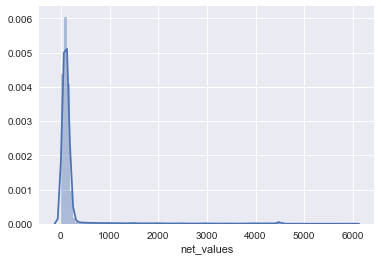

In [79]:
sns.distplot(data_fuel['net_values'],bins=100)

The most expensive reimbursement was **R$6000**

In [80]:
most_expensive_reimbursement = \
    data_fuel[data_fuel['net_values'] == data_fuel['net_values'].max()].iloc[0]
most_expensive_reimbursement

year                                          2015
applicant_id                                  1074
document_id                                5873298
reimbursement_value_total                      NaN
total_net_value                               6000
reimbursement_numbers                         5264
congressperson_name                  ARNON BEZERRA
congressperson_id                            74291
congressperson_document                         90
term                                          2015
state                                           CE
party                                          PTB
term_id                                         55
subquota_number                                  3
subquota_description          Fuels and lubricants
subquota_group_id                                1
subquota_group_description    Veículos Automotores
supplier                          BT PETROLEO LTDA
cnpj_cpf                            01687071000177
document_number                

Here we considered outliers all reimbursements that exceed the **max cost of R$948,90**.

The max cost was calculate using the worst case, biggest gas tank in brazilian market (Ford F-250 with 110l tank), the cost of gas in the most expense gas station in Brasil (R4,99) and 10l of most expensive lubricant (R$40). Most of service stations don't charge to change lubricants.

**We found 24,480 outliers in a total of R$66,952,239.53, representing 4,2% of total.**

There is a big concentration of reimbursements with value of R$4,500

Fonts:
Tanks size: https://panelinhanet.wordpress.com/2013/02/20/combustivel-quantos-litros-cabem-no-tanque-do-seu-veiculo/ in 18/mar/2017
Cost of gas: http://www.anp.gov.br/preco/prc/Resumo_Semanal_Combustiveis.asp in 18/mar/2017
Lubricant capacity: http://www.autoideia.com.br/capacidade_oleo_motor_automoveis&codmar=ford
Cost of lubricant: http://www.mercadomineiro.com.br/pesquisa/oleo-lubrificante-pesquisa-precos

In [81]:
fuel_cost = 4.99
fuel_tank = 110
lubricant_cost = 40
lubricant_capacity = 10
max_cost = fuel_cost*fuel_tank + lubricant_cost*lubricant_capacity
max_cost

948.9

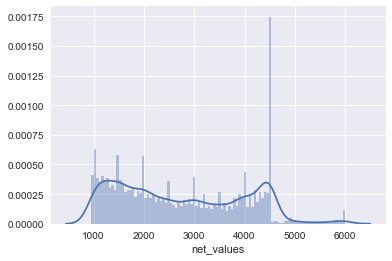

In [82]:
outliers = data_fuel[data_fuel['net_values'] > max_cost].sort_values('net_values', ascending=False)
sns.distplot(outliers['net_values'],bins=100)

In [83]:
print (len(outliers),len(outliers)/len(data_fuel))

24480 0.04296779697013844


In [84]:
outliers['net_values'].sum()

66952239.539999999

In [85]:
outliers

,year,applicant_id,document_id,reimbursement_value_total,total_net_value,reimbursement_numbers,congressperson_name,congressperson_id,congressperson_document,term,...,issue_date,document_value,remark_value,net_values,month,installment,passenger,leg_of_the_trip,batch_number,reimbursement_values
1232120,2015,2245,5875096,NaN,6000.00,5270,MARCO TEBALDI,160536,478,2015.0,...,2015-12-14T00:00:00,6280.00,280.00,6000.00,12,0,NaN,NaN,1251670,NaN
1391945,2016,1706,6123392,NaN,6000.00,5576,ZÉ GERALDO,73931,25,2015.0,...,2016-10-11T00:00:00,6000.00,0.00,6000.00,10,0,NaN,NaN,1330082,NaN
1368368,2016,1074,6025802,NaN,6000.00,5490,ARNON BEZERRA,74291,90,2015.0,...,2016-06-06T00:00:00,6000.00,0.00,6000.00,6,0,NaN,NaN,1299861,NaN
1368371,2016,1074,6044789,NaN,6000.00,5519,ARNON BEZERRA,74291,90,2015.0,...,2016-07-06T00:00:00,6000.00,0.00,6000.00,7,0,NaN,NaN,1305689,NaN
1368377,2016,1074,6066315,NaN,6000.00,5521,ARNON BEZERRA,74291,90,2015.0,...,2016-08-03T00:00:00,6000.00,0.00,6000.00,8,0,NaN,NaN,1312224,NaN
1205378,2015,1881,5833508,NaN,6000.00,5213,MANOEL JUNIOR,141490,130,2015.0,...,2015-10-26T00:00:00,6000.18,0.18,6000.00,10,0,NaN,NaN,1238719,NaN
1205390,2015,1881,5859667,NaN,6000.00,5247,MANOEL JUNIOR,141490,130,2015.0,...,2015-11-27T00:00:00,6001.24,1.24,6000.00,11,0,NaN,NaN,1246765,NaN
1159755,2015,1074,5873298,NaN,6000.00,5264,ARNON BEZERRA,74291,90,2015.0,...,2015-11-24T00:00:00,6000.00,0.00,6000.00,11,0,NaN,NaN,1251211,NaN
1435896,2016,2336,5890792,NaN,6000.00,5302,CÉSAR HALUM,160576,64,2015.0,...,2016-01-05T00:00:00,6000.00,0.00,6000.00,1,0,NaN,NaN,1256653,NaN
1435903,2016,2336,5906169,NaN,6000.00,5326,CÉSAR HALUM,160576,64,2015.0,...,2016-02-03T00:00:00,6000.00,0.00,6000.00,2,0,NaN,NaN,1261365,NaN


Now let's investigate more about reimbursements with value of R$4,500. There are 1912 reimbursements with this value, for 195 congresspeople in 281 suppliers.

In [86]:
outlier_4500 = data_fuel[data_fuel['net_values'] == 4500].sort_values('congressperson_id', ascending=False)
len(outlier_4500)

1912

In [87]:
len(outlier_4500['cnpj_cpf'].unique())

281

In [88]:
len(outlier_4500['congressperson_id'].unique())

195

In [89]:
outlier_4500

,year,applicant_id,document_id,reimbursement_value_total,total_net_value,reimbursement_numbers,congressperson_name,congressperson_id,congressperson_document,term,...,issue_date,document_value,remark_value,net_values,month,installment,passenger,leg_of_the_trip,batch_number,reimbursement_values
1109964,2014,2367,5340224,NaN,4500.0,4600,LUCIO VIEIRA LIMA,94931,205,2015.0,...,2014-01-31T00:00:00,4754.70,254.70,4500.0,1,0,NaN,NaN,1092003,NaN
244426,2010,1665,1975659,NaN,4500.0,3488,JACKSON BARRETO,77701,174,2007.0,...,2010-12-06T00:00:00,4520.73,20.73,4500.0,12,0,NaN,NaN,509501,NaN
176633,2010,1028,1853044,NaN,4500.0,3338,FERNANDO GONÇALVES,74842,603,2007.0,...,2010-05-25T00:00:00,4500.00,0.00,4500.0,5,0,NaN,NaN,475674,NaN
176632,2010,1028,1853041,NaN,4500.0,3338,FERNANDO GONÇALVES,74842,603,2007.0,...,2010-04-15T00:00:00,4500.00,0.00,4500.0,4,0,NaN,NaN,475673,NaN
168527,2009,950,1714315,NaN,4500.0,3118,ALEXANDRE SANTOS,74830,285,2011.0,...,2009-11-01T00:00:00,5054.20,554.20,4500.0,11,0,NaN,NaN,434761,NaN
168520,2009,950,1690845,NaN,4500.0,3096,ALEXANDRE SANTOS,74830,285,2011.0,...,2009-10-01T00:00:00,4933.20,433.20,4500.0,10,0,NaN,NaN,428440,NaN
168497,2009,950,1564546,NaN,4500.0,2888,ALEXANDRE SANTOS,74830,285,2011.0,...,2009-04-01T00:00:00,5157.99,657.99,4500.0,4,0,NaN,NaN,388478,NaN
168504,2009,950,1614852,NaN,4500.0,2951,ALEXANDRE SANTOS,74830,285,2011.0,...,2009-05-30T00:00:00,4934.01,434.01,4500.0,5,0,NaN,NaN,406150,NaN
168513,2009,950,1648394,NaN,4500.0,3022,ALEXANDRE SANTOS,74830,285,2011.0,...,2009-08-01T00:00:00,5308.52,808.52,4500.0,8,0,NaN,NaN,415932,NaN
168518,2009,950,1679641,NaN,4500.0,3079,ALEXANDRE SANTOS,74830,285,2011.0,...,2009-09-01T00:00:00,5178.39,678.39,4500.0,9,0,NaN,NaN,425213,NaN


## Who are these applicants?

In total 1124 congressperson ask by reimbursement and most of them (75%) received R$175,007 or less.

But some congressmen received more than R$400.000,00 in the same period.

In [90]:
len(data_fuel['applicant_id'].unique())

1124

In [91]:
applicants_by_net_value = \
    pd.DataFrame(data_fuel.groupby(['applicant_id'], as_index=False).sum()[['applicant_id', 'net_values']])

In [92]:
congressperson_list = data_fuel[
    ['applicant_id', 'congressperson_name', 'party', 'state']]
congressperson_list = congressperson_list. \
    drop_duplicates('applicant_id', keep='first')
ranking = pd.merge(applicants_by_net_value,
                   congressperson_list,
                   how='left',
                   on='applicant_id').sort_values('net_values', ascending=False)
ranking.head(10)

,applicant_id,net_values,congressperson_name,party,state
469,1860,430712.61,JOSÉ AIRTON CIRILO,PT,CE
12,137,422204.29,GONZAGA PATRIOTA,PSB,PE
142,1050,415632.82,JAIME MARTINS,PSD,MG
83,773,412241.94,NELSON MARQUEZELLI,PTB,SP
447,1836,411958.92,FLAVIANO MELO,PMDB,AC
165,1133,409657.07,NELSON MEURER,PP,PR
159,1097,408577.19,JÚLIO CESAR,PSD,PI
223,1332,408407.81,GIVALDO CARIMBÃO,PHS,AL
350,1671,398060.27,JOÃO CAMPOS,PRB,GO
387,1773,397484.02,AELTON FREITAS,PR,MG


In [93]:
ranking['net_values'].describe()

count      1124.000000
mean     113519.261993
std       96911.589007
min          33.990000
25%       41713.952500
50%       83102.295000
75%      175007.895000
max      430712.610000
Name: net_values, dtype: float64

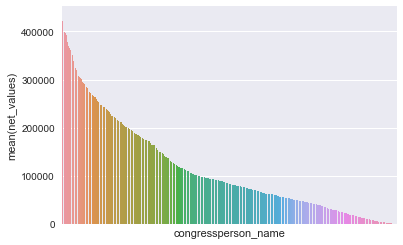

In [94]:
graph = sns.barplot(x='congressperson_name',
                    y='net_values',
                    data=ranking)
graph.axes.get_xaxis().set_ticks([]); None

Now let's investigate the congresspeople who asked for reimbursement greater than max cost.

In [95]:
congressperson_outlier = outliers[
    ['applicant_id', 'congressperson_name', 'party', 'state']]
congressperson_outlier = congressperson_outlier. \
    drop_duplicates('applicant_id', keep='first')
ranking_outlier = pd.merge(applicants_by_net_value,
                   congressperson_outlier,
                   how='left',
                   on='applicant_id').sort_values('net_values', ascending=False)
ranking_outlier.head(10)

,applicant_id,net_values,congressperson_name,party,state
469,1860,430712.61,JOSÉ AIRTON CIRILO,PT,CE
12,137,422204.29,GONZAGA PATRIOTA,PSB,PE
142,1050,415632.82,JAIME MARTINS,PSD,MG
83,773,412241.94,NaN,NaN,NaN
447,1836,411958.92,FLAVIANO MELO,PMDB,AC
165,1133,409657.07,NELSON MEURER,PP,PR
159,1097,408577.19,JÚLIO CESAR,PSD,PI
223,1332,408407.81,GIVALDO CARIMBÃO,PHS,AL
350,1671,398060.27,JOÃO CAMPOS,PRB,GO
387,1773,397484.02,AELTON FREITAS,PR,MG


# Suppliers

In [96]:
suppliers_list = pd.DataFrame(data_fuel.groupby(['cnpj_cpf','supplier'], as_index=False)['net_values'].sum())
suppliers_list = suppliers_list.sort_values('net_values', ascending=False)
suppliers_list.head(10)

,cnpj_cpf,supplier,net_values
56784,17462474000158,POSTO TOCANTINS LTDA,760391.90
43122,08596605000107,POSTO HOMERO CASTELO BRANCO LTDA,518413.69
64011,37130481000160,SÃO JOÃO POSTOS DE ABASTECIMENTOS E SERVIÇOS,450422.87
25845,04473193000159,POSTO DA TORRE LTDA,437621.25
5227,00306597003112,CASCOL COMBUSTIVEIS PARA VEICULOS LTDA,375426.21
11599,01468484000160,KOTINSKI & CIA.LTDA,350773.25
15651,02486455000194,DAMPETRO COMERCIO DE DERIVADOS DE PETROLEO LTDA,342593.19
25539,04397008000194,AUTO POSTO ESMERALDA,328504.45
63133,35593870000104,NUNES DERIVADOS DE PETROLEO LTDA,322372.84
16733,02728991000159,QUADRAMARES COMÉRCIO DE COMBUSTÍVEIS LTDA,316008.51


In [97]:
suppliers_list['net_values'].describe()

count     80241.000000
mean       1590.152068
std       10310.372947
min           0.010000
25%          81.000000
50%         140.000000
75%         406.470000
max      760391.900000
Name: net_values, dtype: float64

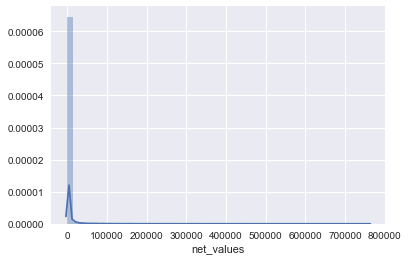

In [98]:
sns.distplot(suppliers_list['net_values'])

Here we check all suppliers of outliers reimbursements (greater than max cost)

In [99]:
suppliers_outliers = pd.DataFrame(outliers.groupby(['cnpj_cpf','supplier'], as_index=False)['net_values'].sum())
suppliers_outliers = suppliers_outliers.sort_values('net_values', ascending=False)
suppliers_outliers.head(10)

,cnpj_cpf,supplier,net_values
3178,17462474000158,POSTO TOCANTINS LTDA,713989.80
2414,08596605000107,POSTO HOMERO CASTELO BRANCO LTDA,506799.97
449,01468484000160,KOTINSKI & CIA.LTDA,345273.17
1387,04397008000194,AUTO POSTO ESMERALDA,314440.07
853,02728991000159,QUADRAMARES COMÉRCIO DE COMBUSTÍVEIS LTDA,310145.83
989,03067443000198,ACF COMÉRCIO E SERVIÇOS LTDA,304790.43
4221,84057447000197,GOMES E GONTIJO LTDA,302734.70
772,02486455000194,DAMPETRO COMERCIO DE DERIVADOS DE PETROLEO LTDA,294344.04
397,01198443000282,COMDEPE COM. DE DERIVADOS DE PETRÓLEO LTDA,268246.38
1093,03375210000152,ELIANE STANG HUNING,262284.44


In [100]:
suppliers_outliers['net_values'].describe()

count      4407.000000
mean      15192.248591
std       33229.048190
min         950.000000
25%        2159.925000
50%        4097.430000
75%       11489.820000
max      713989.800000
Name: net_values, dtype: float64

In [101]:
suppliers_outliers['net_values'].sum()

66952239.539999999

# Conclusion and next steps

We found many suspicious reimbursement that exceed the value of the biggest cost possible of a fuel tank and an oil change. We found 24,480 outliers, R$66,952,239.53, representing 4,2% of total. 

**This analysis must be cross-checked by other members of the Serenade of Love and, if it is robust enough, included in Rosie's algorithms.**

There are a unusual concentration of reimbursement of R$4,500. 

The next steps are:
- Check the expenses in the time (by year, month and day)
- Cross the data of 'Fuels and lubricants' with "Taxi, toll and parking" and 'Automotive vehicle renting or charter'. 
- Cross data of congresspeople and suppliers.